In [1]:
from tb_log_reader import LogReader
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_context("paper", rc={"xtick.labelsize":24, "ytick.labelsize":24, "axes.labelsize":24, "legend.fontsize": 24, "axes.titlesize": 24}) # ,"axes.titlesize":8,"axes.labelsize":5

## Read TF logs

In [3]:
lr_no_pretr_val = []
lr_pretr_val = []

path = "C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/tensorboard_logs"
for i in range(5):
    
    lr_no_pretr = LogReader('tensorboard_logs/brats20_3d_no_pretrained_{}_lr_0.001_epochs_50'.format(i+1))
    lr_no_pretr_events = lr_no_pretr.load_run(0, test=True)
#     lr_no_pretr_events = lr_no_pretr.load_run(0, test=True)

    lr_no_pretr_val.append({
        'edema': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'edema'),
        'tumor_core': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'tumor_core'),
        'enhancing': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'enhancing')
    })
    
    lr_pretr = LogReader('tensorboard_logs/brats20_3d_pre_{}_lr_0.001_epochs_50'.format(i+1))
    lr_pretr_val_events = lr_pretr.load_run(0, test=True)
#     lr_pretr_val_events = lr_pretr.load_run(0, test=True)

    lr_pretr_val.append({
        'edema': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'edema'),
        'tumor_core': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'tumor_core'),
        'enhancing': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'enhancing')
    })

tensorboard_logs/brats20_3d_no_pretrained_1_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_no_pretrained_1_lr_0.001_epochs_50\20210301-142350\test


tensorboard_logs/brats20_3d_pre_1_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_pre_1_lr_0.001_epochs_50\20210301-115902\test
tensorboard_logs/brats20_3d_no_pretrained_2_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_no_pretrained_2_lr_0.001_epochs_50\20210301-191252\test
tensorboard_logs/brats20_3d_pre_2_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_pre_2_lr_0.001_epochs_50\20210301-164845\test
tensorboard_logs/brats20_3d_no_pretrained_3_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_no_pretrained_3_lr_0.001_epochs_50\20210302-000552\test


tensorboard_logs/brats20_3d_pre_3_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_pre_3_lr_0.001_epochs_50\20210301-213737\test
tensorboard_logs/brats20_3d_no_pretrained_4_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_no_pretrained_4_lr_0.001_epochs_50\20210302-045854\test
tensorboard_logs/brats20_3d_pre_4_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_pre_4_lr_0.001_epochs_50\20210302-023414\test
tensorboard_logs/brats20_3d_no_pretrained_5_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_no_pretrained_5_lr_0.001_epochs_50\20210302-094836\test


tensorboard_logs/brats20_3d_pre_5_lr_0.001_epochs_50
The selected path is: tensorboard_logs/brats20_3d_pre_5_lr_0.001_epochs_50\20210302-072332\test


i: 0, Tumor region: edema
i: 1, Tumor region: tumor_core
i: 2, Tumor region: enhancing


<ipython-input-7-f27f0e10b2d8>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i_plot].set_yticklabels([''] * 7)
<ipython-input-7-f27f0e10b2d8>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i_plot].set_yticklabels([''] * 7)


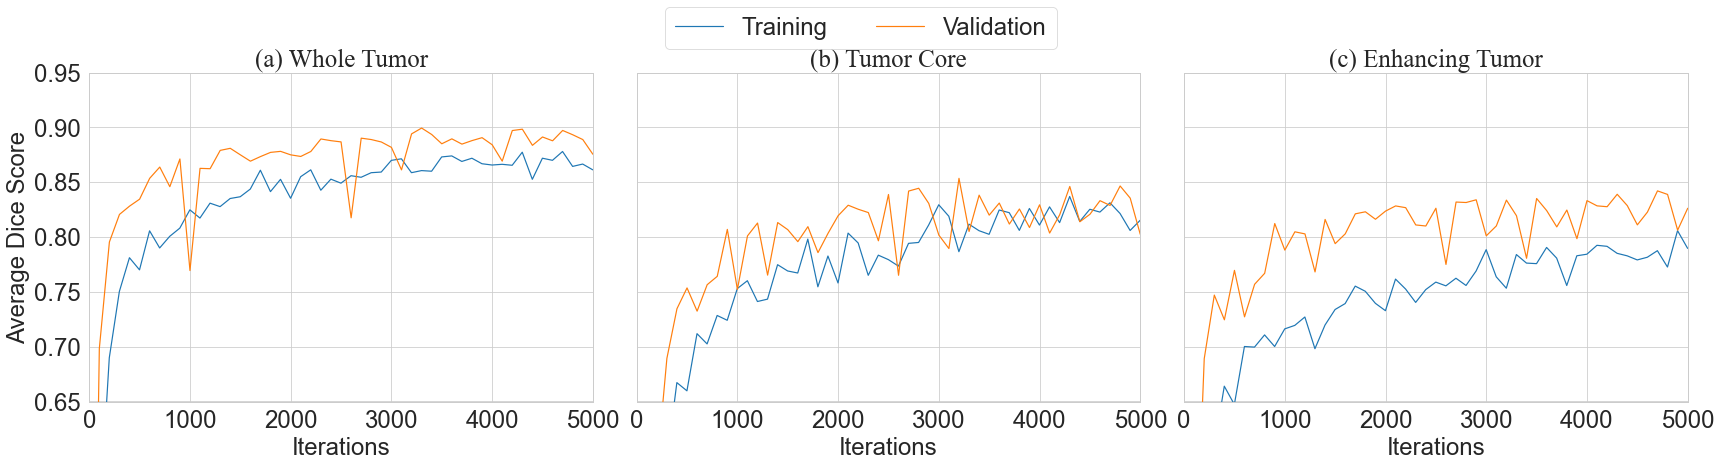

In [7]:
lr_val_list = []
lr_train_list = []

path = "C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/tensorboard_logs"
model_name = "brats_riccian_4_channels_weight_update_4_lr_0.001"

lr_validation = LogReader(f'tensorboard_logs/{model_name}')
lr_val_events = lr_validation.load_run(0, test=True)
#     lr_pretr_val_events = lr_pretr.load_run(0, test=True)

lr_val_list.append({
    'edema': lr_validation.get_df_from_scalar(lr_val_events, 'edema'),
    'tumor_core': lr_validation.get_df_from_scalar(lr_val_events, 'tumor_core'),
    'enhancing': lr_validation.get_df_from_scalar(lr_val_events, 'enhancing')
})

lr_training = LogReader(f'tensorboard_logs/{model_name}')
lr_train_events = lr_training.load_run(0, test=False)

lr_train_list.append({
    'edema': lr_training.get_df_from_scalar(lr_train_events, 'edema'),
    'tumor_core': lr_training.get_df_from_scalar(lr_train_events, 'tumor_core'),
    'enhancing': lr_training.get_df_from_scalar(lr_train_events, 'enhancing')
})
# 3D

label_dict = {
    'edema': '(a) Whole Tumor',
    'tumor_core': '(b) Tumor Core',
    'enhancing': '(c) Enhancing Tumor'
}

f, axes = plt.subplots(1, 3)
f.set_size_inches(24, 6)
# sns.despine(left=True)
sns.set_style("whitegrid")

for i_plot, tumor_region in enumerate(['edema', 'tumor_core', 'enhancing']):
    
    print(f"i: {i_plot}, Tumor region: {tumor_region}")

    label = label_dict[tumor_region]

    df_train = pd.concat([lr_train_list[i][tumor_region][['steps', 'values']].iloc[:] for i in range(1)], axis=0)
    df_valid = pd.concat([lr_val_list[i][tumor_region][['steps', 'values']].iloc[:] for i in range(1)], axis=0)

    df_train = df_train.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
    df_valid = df_valid.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
    
#     df_no_pretr.to_csv(f"Albunet3d_nopretrained_{tumor_region}.csv", index=False)
#     df_pretr.to_csv(f"Albunet3d_pretrained_{tumor_region}.csv", index=False)

    #idxs = lr_no_pretr_val[i]['tumor_core']['steps']
    #df_no_pretr = pd.concat([idxs, df_no_pretr], axis=1).set_index('steps')
    #df_pretr = pd.concat([idxs, df_pretr], axis=1).set_index('steps')
    # relplot
    
    f = sns.lineplot(x='Iterations', y='Average Dice Score', data=df_train, markers=True, label='Training', ci='sd', legend=False, ax=axes[i_plot])
    g = sns.lineplot(x='Iterations', y='Average Dice Score', data=df_valid, markers=True, label='Validation', ci='sd', legend=False, ax=axes[i_plot])
    f.set(ylim=(0.65, 0.95))
    g.set(ylim=(0.65, 0.95))
    f.set(xlim=(0, 5000))
    g.set(xlim=(0, 5000))
    axes[i_plot].title.set_text(label)
    axes[i_plot].title.set_y(-0.4)
    axes[i_plot].title.set_fontfamily('Times New Roman')
    axes[i_plot].title.set_fontsize(25)
    # axes[i_plot].title.set_fontserif('Times New Roman')
    # axes[i_plot].title.set_fontname('Times New Roman')
    # axes[i_plot].legend(loc='lower right')
    
    if i_plot > 0:
        #pass
        axes[i_plot].set_ylabel('')
        #axes[i_plot].get_yaxis().set_visible(False)
        axes[i_plot].set_yticklabels([''] * 7)

handles, labels = axes[0].get_legend_handles_labels()
plt.tight_layout()
legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=2, bbox_to_anchor = (0,0.1,1,1), bbox_transform = plt.gcf().transFigure)

plt.savefig("figures/eval_progress.png", bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# for i in range(5):
    
    # sns.lineplot(x='steps', y='values', data=lr_no_pretr_val[i]['tumor_core'], dashes=True, markers=True)
    # sns.lineplot(x='steps', y='values', data=lr_pretr_val[i]['edema'], dashes=False, markers=True)


### Brats18

In [21]:
lr_no_pretr_val = []
lr_pretr_val = []
lr_pretr_train_list = []

path = "C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/tensorboard_logs"
#     brats18_3d_pretrained_1_lr_0.001_epochs_20
#     lr_no_pretr = LogReader('tensorboard_logs/brats_3d_no_pretrained_{}_lr_0.001_epochs_50'.format(i+1))
#     lr_no_pretr_events = lr_no_pretr.load_run(0, test=True)
# #     lr_no_pretr_events = lr_no_pretr.load_run(0, test=True)

#     lr_no_pretr_val.append({
#         'edema': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'edema'),
#         'tumor_core': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'tumor_core'),
#         'enhancing': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'enhancing')
#     })
    
lr_pretr = LogReader('tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20')
lr_pretr_val_events = lr_pretr.load_run(0, test=True)
#     lr_pretr_val_events = lr_pretr.load_run(0, test=True)

lr_pretr_val.append({
    'edema': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'edema'),
    'tumor_core': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'tumor_core'),
    'enhancing': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'enhancing')
})

lr_pretr_train = LogReader('tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20')
lr_pretr_train_events = lr_pretr.load_run(0, test=False)
#     lr_pretr_val_events = lr_pretr.load_run(0, test=True)

lr_pretr_train_list.append({
    'edema': lr_pretr_train.get_df_from_scalar(lr_pretr_train_events, 'edema'),
    'tumor_core': lr_pretr_train.get_df_from_scalar(lr_pretr_train_events, 'tumor_core'),
    'enhancing': lr_pretr_train.get_df_from_scalar(lr_pretr_train_events, 'enhancing')
})

tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20
The selected path is: tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20\20210307-182439\test
tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20
The selected path is: tensorboard_logs/brats18_3d_pretrained_1_no_multigpu_lr_0.001_epochs_20\20210307-182439\train
